In [1]:
using Knet
# Test if Knet is using gpu
Knet.gpu()

┌ Warning: CuArrays.jl only supports CUDNN v7.6 or higher
└ @ CuArrays /kuacc/users/ssafadoust20/.julia/packages/CuArrays/A6GUx/src/CuArrays.jl:122


0

In [2]:
using Pkg;

# Install missing packages
for p in ["Knet", "MLJ", "MLJModels", "Distributions", "Plots", "NPZ", "CSV"]
    if !haskey(Pkg.installed(),p)
        Pkg.add(p);
    end
end

using Knet, Plots, Random,  MLJ, Distributions, LinearAlgebra, NPZ, CSV
atype = (Knet.gpu()>=0 ? Knet.KnetArray{Float32} : Array{Float32})

KnetArray{Float32,N} where N

In [67]:
include("model.jl")
include("loss.jl")
include("classify.jl")
include("data.jl")
include("train.jl")

# Toy Datasets

## Moons Dataset

In [28]:
realnvp, prior, data, int_labels = train(in_dim=2, hidden_dim=512, num_coupling_layers=5, num_hidden_layers=1, k=256,
    lr=1e-4, steps=8001, print_freq=500, batch_size="auto", dataset="moons", latent_mean_random=false);

iter 1 loss: T(24.641) 
iter 501 loss: T(6.8350997) 
iter 1001 loss: T(6.1423373) 
iter 1501 loss: T(6.369871) 
iter 2001 loss: T(5.9977303) 
iter 2501 loss: T(6.280567) 
iter 3001 loss: T(6.044751) 
iter 3501 loss: T(5.906292) 
iter 4001 loss: T(5.8158226) 
iter 4501 loss: T(5.770557) 
iter 5001 loss: T(6.0741) 
iter 5501 loss: T(6.1870704) 
iter 6001 loss: T(6.397092) 
iter 6501 loss: T(5.974298) 
iter 7001 loss: T(5.6629686) 
iter 7501 loss: T(5.683778) 
iter 8001 loss: T(5.767517) 


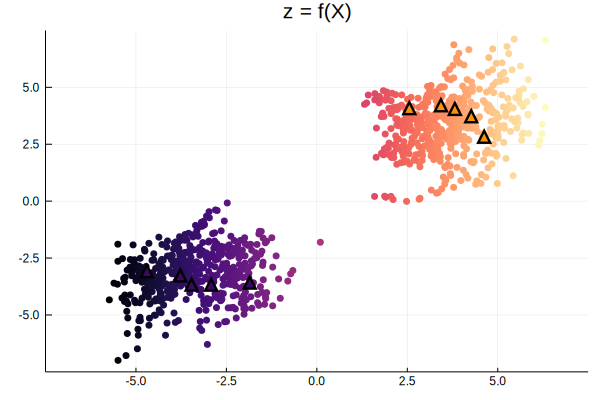

In [29]:
inv = realnvp(data)
xs = convert(Array{Float32}, inv[1,:])
ys = convert(Array{Float32}, inv[2,:])
p1 = plot(xs, ys, title="z = f(X)", seriestype = :scatter, xlim=(-7.5, 7.5), ylim=(-7.5,7.5), m = :magma, zcolor = xs, markerstrokewidth=0, legend=:none)
for i in 1:(maximum(int_labels)+1)
    m = [index[2] for index in findall(label->label==(i-1), int_labels)]
    xs = convert(Array{Float32}, inv[1,m])
    ys = convert(Array{Float32}, inv[2,m])
    plot!(xs, ys, seriestype = :scatter, markershape = :utriangle, zcolor=prior.means[1,i], markersize=6, markerstrokewidth=3)
end
p1

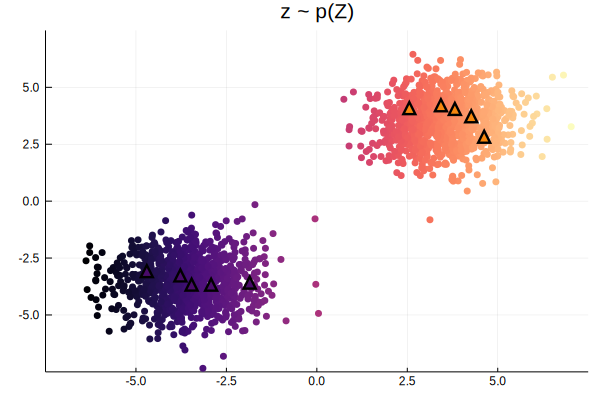

In [30]:
n_samples = 1000
zs = zeros(2, n_samples*prior.n_components)
for i in 1:prior.n_components
    for j in 1:n_samples
        z = Distributions.rand(prior.gaussians[i])
        zs[:,(i-1)*n_samples+j] = z
    end
end

p2 = plot(zs[1,:], zs[2,:], title="z ~ p(Z)", seriestype = :scatter, xlim=(-7.5, 7.5), ylim=(-7.5,7.5), m = :magma, zcolor = zs[1,:], markerstrokewidth=0, legend=:none)
for i in 1:(maximum(int_labels)+1)
    m = [index[2] for index in findall(label->label==(i-1), int_labels)]
    xs = convert(Array{Float32}, inv[1,m])
    ys = convert(Array{Float32}, inv[2,m])
    plot!(xs, ys, seriestype = :scatter, markershape = :utriangle, zcolor=prior.means[1,i], markersize=6, markerstrokewidth=3)
end
p2

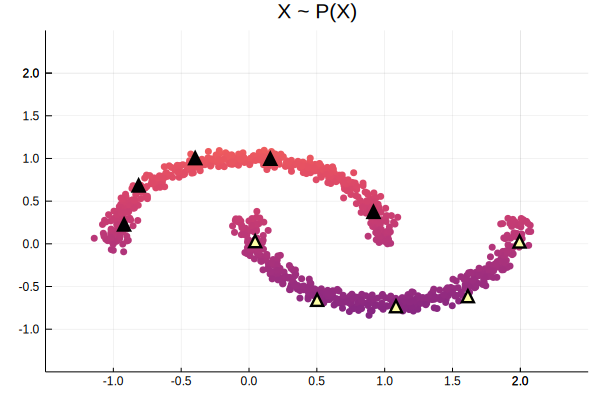

In [31]:
xs = convert(Array{Float32}, data[1,:])
ys = convert(Array{Float32}, data[2,:])
p3 = plot(xs, ys, title="X ~ P(X)", seriestype = :scatter, xlim=(-1.5, 2.5), ylim=(-1.5,2.5), m = :magma, zcolor = ys, markerstrokewidth=0, legend=:none)
for i in 1:(maximum(int_labels)+1)
    m = [index[2] for index in findall(label->label==(i-1), int_labels)]
    xs = convert(Array{Float32}, data[1,m])
    ys = convert(Array{Float32}, data[2,m])
    plot!(xs, ys, seriestype = :scatter, markershape = :utriangle, zcolor=prior.means[1,i], markersize=6, markerstrokewidth=3)
end
p3

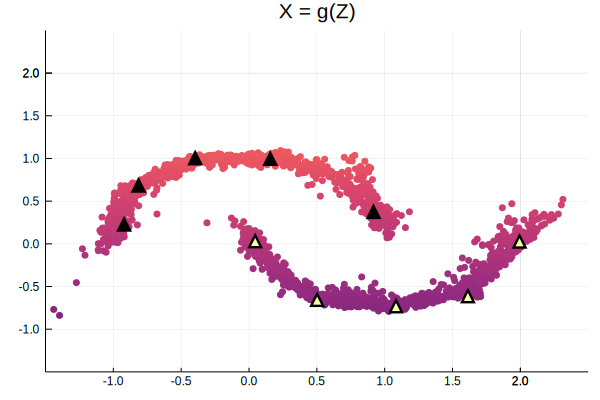

In [32]:
xs = convert(Array{Float32}, inverse(realnvp, convert(atype, zs)))
p4 = plot(xs[1,:], xs[2,:], title="X = g(Z)", seriestype = :scatter, xlim=(-1.5, 2.5), ylim=(-1.5,2.5), m = :magma, zcolor = xs[2,:], markerstrokewidth=0, legend=:none)
for i in 1:(maximum(int_labels)+1)
    m = [index[2] for index in findall(label->label==(i-1), int_labels)]
    xs = convert(Array{Float32}, data[1,m])
    ys = convert(Array{Float32}, data[2,m])
    plot!(xs, ys, seriestype = :scatter, markershape = :utriangle, zcolor=prior.means[1,i], markersize=6, markerstrokewidth=3)
end
p4

┌ Warning: rainbow is found in more than one library: misc, colorcet. Choosing misc
└ @ PlotUtils /kuacc/users/ssafadoust20/.julia/packages/PlotUtils/10ojB/src/color_gradients.jl:40


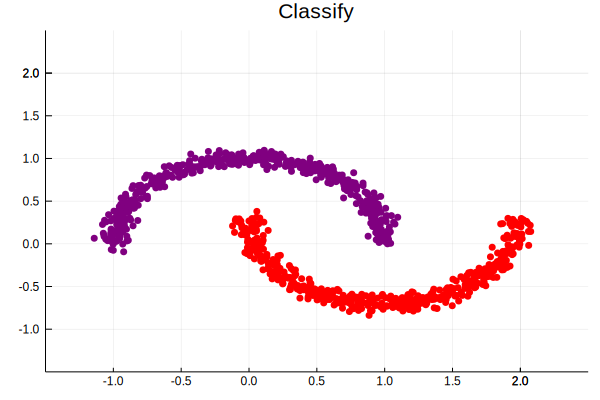

In [33]:
classes = classify(prior, inv)
array_inv = convert(Array{Float32}, inv)
xs = convert(Array{Float32}, data[1,:])
ys = convert(Array{Float32}, data[2,:])
p5 = plot(xs, ys, title="Classify", seriestype = :scatter, xlim=(-1.5, 2.5), ylim=(-1.5,2.5), m = :rainbow, zcolor = classes, markerstrokewidth=0, legend=:none)
p5

## Circles Dataset

In [34]:
realnvp, prior, data, int_labels = train(in_dim=2, hidden_dim=512, num_coupling_layers=5, num_hidden_layers=1, k=256,
    lr=1e-4, steps=16001, print_freq=500, batch_size="auto", dataset="circles", latent_mean_random=false);

iter 1 loss: T(18.87915) 
iter 501 loss: T(7.2977767) 
iter 1001 loss: T(7.1071405) 
iter 1501 loss: T(6.8363843) 
iter 2001 loss: T(7.4482436) 
iter 2501 loss: T(6.573512) 
iter 3001 loss: T(6.482548) 
iter 3501 loss: T(6.1977) 
iter 4001 loss: T(6.438843) 
iter 4501 loss: T(6.58332) 
iter 5001 loss: T(6.2109585) 
iter 5501 loss: T(6.4649715) 
iter 6001 loss: T(6.204814) 
iter 6501 loss: T(6.5415306) 
iter 7001 loss: T(6.41965) 
iter 7501 loss: T(6.4849577) 
iter 8001 loss: T(6.7146635) 
iter 8501 loss: T(6.399313) 
iter 9001 loss: T(6.477782) 
iter 9501 loss: T(6.554103) 
iter 10001 loss: T(6.4637885) 
iter 10501 loss: T(6.4166546) 
iter 11001 loss: T(6.5102158) 
iter 11501 loss: T(6.3837433) 
iter 12001 loss: T(6.475582) 
iter 12501 loss: T(6.3961897) 
iter 13001 loss: T(6.4454207) 
iter 13501 loss: T(6.253765) 
iter 14001 loss: T(6.944837) 
iter 14501 loss: T(6.4016547) 
iter 15001 loss: T(6.165271) 
iter 15501 loss: T(6.34043) 
iter 16001 loss: T(6.4696083) 


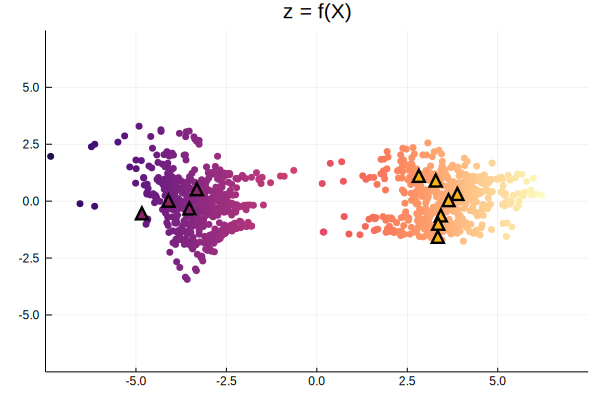

In [35]:
inv = realnvp(data)
xs = convert(Array{Float32}, inv[1,:])
ys = convert(Array{Float32}, inv[2,:])
p1 = plot(xs, ys, title="z = f(X)", seriestype = :scatter, xlim=(-7.5, 7.5), ylim=(-7.5,7.5), m = :magma, zcolor = xs, markerstrokewidth=0, legend=:none)
for i in 1:(maximum(int_labels)+1)
    m = [index[2] for index in findall(label->label==(i-1), int_labels)]
    xs = convert(Array{Float32}, inv[1,m])
    ys = convert(Array{Float32}, inv[2,m])
    plot!(xs, ys, seriestype = :scatter, markershape = :utriangle, zcolor=prior.means[1,i], markersize=6, markerstrokewidth=3)
end
p1

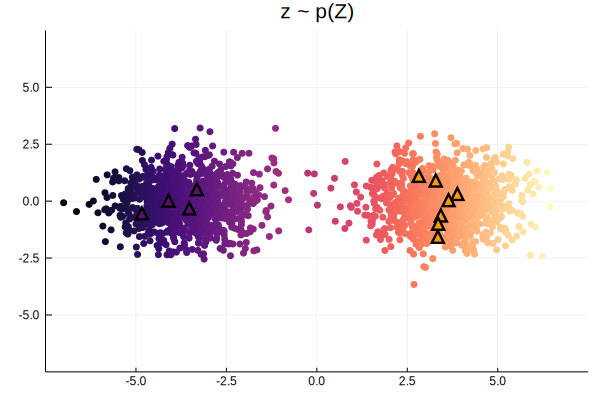

In [36]:
n_samples = 1000
zs = zeros(2, n_samples*prior.n_components)
for i in 1:prior.n_components
    for j in 1:n_samples
        z = Distributions.rand(prior.gaussians[i])
        zs[:,(i-1)*n_samples+j] = z
    end
end

p2 = plot(zs[1,:], zs[2,:], title="z ~ p(Z)", seriestype = :scatter, xlim=(-7.5, 7.5), ylim=(-7.5,7.5), m = :magma, zcolor = zs[1,:], markerstrokewidth=0, legend=:none)
for i in 1:(maximum(int_labels)+1)
    m = [index[2] for index in findall(label->label==(i-1), int_labels)]
    xs = convert(Array{Float32}, inv[1,m])
    ys = convert(Array{Float32}, inv[2,m])
    plot!(xs, ys, seriestype = :scatter, markershape = :utriangle, zcolor=prior.means[1,i], markersize=6, markerstrokewidth=3)
end
p2

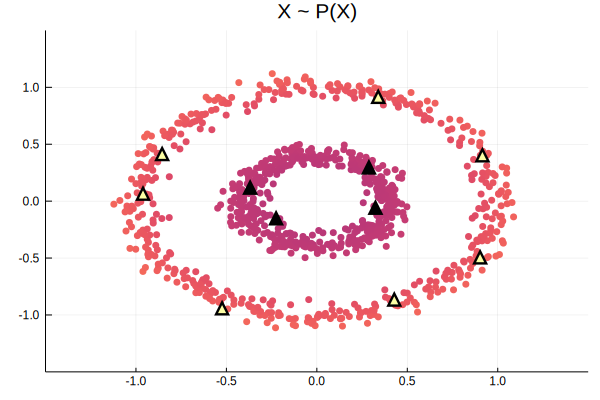

In [37]:
xs = convert(Array{Float32}, data[1,:])
ys = convert(Array{Float32}, data[2,:])
p3 = plot(xs, ys, title="X ~ P(X)", seriestype = :scatter, xlim=(-1.5, 1.5), ylim=(-1.5,1.5), m = :magma, zcolor = xs.^2+ys.^2, markerstrokewidth=0, legend=:none)
for i in 1:(maximum(int_labels)+1)
    m = [index[2] for index in findall(label->label==(i-1), int_labels)]
    xs = convert(Array{Float32}, data[1,m])
    ys = convert(Array{Float32}, data[2,m])
    plot!(xs, ys, seriestype = :scatter, markershape = :utriangle, zcolor=prior.means[1,i], markersize=6, markerstrokewidth=3)
end
p3

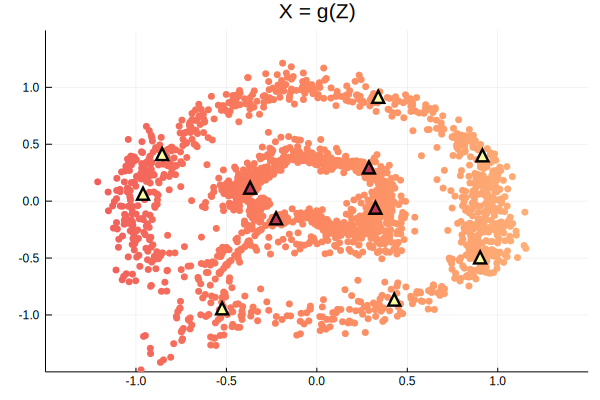

In [38]:
xs = convert(Array{Float32}, inverse(realnvp, convert(atype, zs)))
p4 = plot(xs[1,:], xs[2,:], title="X = g(Z)", seriestype = :scatter, xlim=(-1.5, 1.5), ylim=(-1.5,1.5), m=:magma, zcolor = xs[1,:], markerstrokewidth=0, legend=:none)
for i in 1:(maximum(int_labels)+1)
    m = [index[2] for index in findall(label->label==(i-1), int_labels)]
    xs = convert(Array{Float32}, data[1,m])
    ys = convert(Array{Float32}, data[2,m])
    plot!(xs, ys, seriestype = :scatter, markershape = :utriangle, zcolor=prior.means[1,i], markersize=6, markerstrokewidth=3)
end
p4

┌ Warning: rainbow is found in more than one library: misc, colorcet. Choosing misc
└ @ PlotUtils /kuacc/users/ssafadoust20/.julia/packages/PlotUtils/10ojB/src/color_gradients.jl:40


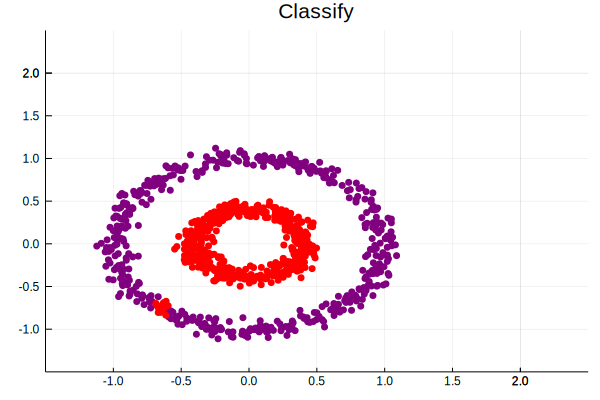

In [39]:
classes = classify(prior, inv)
array_inv = convert(Array{Float32}, inv)
xs = convert(Array{Float32}, data[1,:])
ys = convert(Array{Float32}, data[2,:])
p5 = plot(xs, ys, title="Classify", seriestype = :scatter, xlim=(-1.5, 2.5), ylim=(-1.5,2.5), m = :rainbow, zcolor = classes, markerstrokewidth=0, legend=:none)
p5

## 8 Gaussians Dataset

In [40]:
realnvp, prior, data, int_labels = train(in_dim=2, hidden_dim=512, num_coupling_layers=5, num_hidden_layers=1, k=256,
    lr=1e-4, steps=16001, print_freq=500, batch_size="auto", dataset="8gauss", latent_mean_random=false);

iter 1 loss: T(31.965155) 
iter 501 loss: T(9.38138) 
iter 1001 loss: T(8.616509) 
iter 1501 loss: T(8.797178) 
iter 2001 loss: T(8.430412) 
iter 2501 loss: T(8.571417) 
iter 3001 loss: T(8.459066) 
iter 3501 loss: T(8.843436) 
iter 4001 loss: T(8.568019) 
iter 4501 loss: T(8.417466) 
iter 5001 loss: T(8.483061) 
iter 5501 loss: T(8.3016405) 
iter 6001 loss: T(8.4321785) 
iter 6501 loss: T(8.6157055) 
iter 7001 loss: T(8.257545) 
iter 7501 loss: T(8.303805) 
iter 8001 loss: T(8.393836) 
iter 8501 loss: T(8.874526) 
iter 9001 loss: T(8.477106) 
iter 9501 loss: T(7.9946465) 
iter 10001 loss: T(8.414391) 
iter 10501 loss: T(8.519813) 
iter 11001 loss: T(8.28078) 
iter 11501 loss: T(8.40137) 
iter 12001 loss: T(8.229017) 
iter 12501 loss: T(8.292552) 
iter 13001 loss: T(8.596981) 
iter 13501 loss: T(8.351942) 
iter 14001 loss: T(8.561197) 
iter 14501 loss: T(8.36484) 
iter 15001 loss: T(8.50347) 
iter 15501 loss: T(8.254571) 
iter 16001 loss: T(8.192079) 


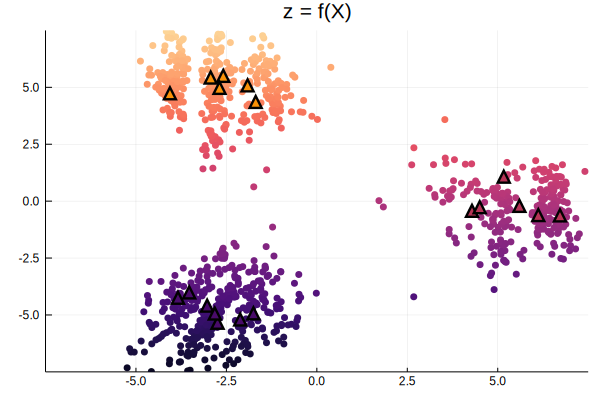

In [41]:
inv = realnvp(data)
xs = convert(Array{Float32}, inv[1,:])
ys = convert(Array{Float32}, inv[2,:])
p1 = plot(xs, ys, title="z = f(X)", seriestype = :scatter, xlim=(-7.5, 7.5), ylim=(-7.5,7.5), m = :magma, zcolor = ys, markerstrokewidth=0, legend=:none)
for i in 1:(maximum(int_labels)+1)
    m = [index[2] for index in findall(label->label==(i-1), int_labels)]
    xs = convert(Array{Float32}, inv[1,m])
    ys = convert(Array{Float32}, inv[2,m])
    plot!(xs, ys, seriestype = :scatter, markershape = :utriangle, zcolor=prior.means[2,i], markersize=6, markerstrokewidth=3)
end
p1

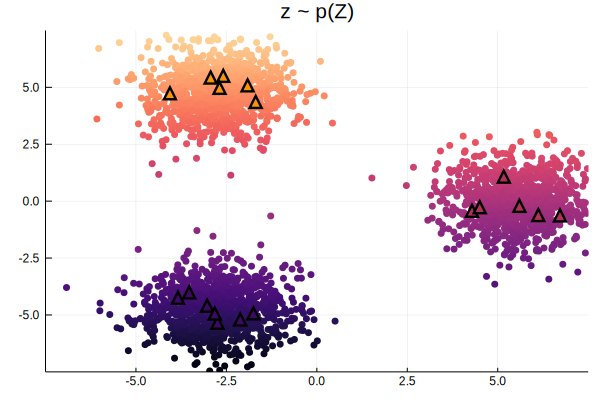

In [42]:
n_samples = 1000
zs = zeros(2, n_samples*prior.n_components)
for i in 1:prior.n_components
    for j in 1:n_samples
        z = Distributions.rand(prior.gaussians[i])
        zs[:,(i-1)*n_samples+j] = z
    end
end

p2 = plot(zs[1,:], zs[2,:], title="z ~ p(Z)", seriestype = :scatter, xlim=(-7.5, 7.5), ylim=(-7.5,7.5), m = :magma, zcolor = zs[2,:], markerstrokewidth=0, legend=:none)
for i in 1:(maximum(int_labels)+1)
    m = [index[2] for index in findall(label->label==(i-1), int_labels)]
    xs = convert(Array{Float32}, inv[1,m])
    ys = convert(Array{Float32}, inv[2,m])
    plot!(xs, ys, seriestype = :scatter, markershape = :utriangle, zcolor=prior.means[2,i], markersize=6, markerstrokewidth=3)
end
p2

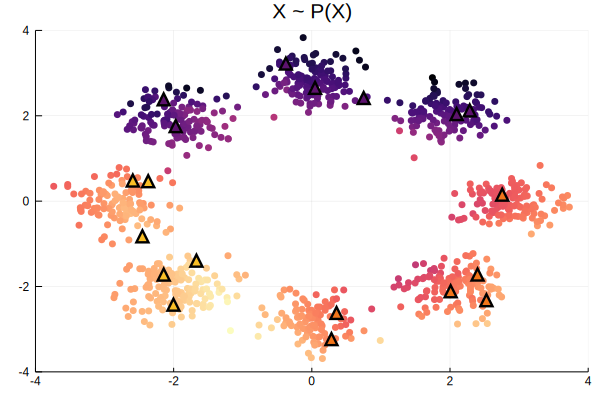

In [43]:
xs = convert(Array{Float32}, data[1,:])
ys = convert(Array{Float32}, data[2,:])
p3 = plot(xs, ys, title="X ~ P(X)", seriestype = :scatter, xlim=(-4, 4), ylim=(-4,4), m = :magma, zcolor = convert(Array{Float32},inv[1,:]+inv[2,:]), markerstrokewidth=0, legend=:none)
for i in 1:(maximum(int_labels)+1)
    m = [index[2] for index in findall(label->label==(i-1), int_labels)]
    xs = convert(Array{Float32}, data[1,m])
    ys = convert(Array{Float32}, data[2,m])
    plot!(xs, ys, seriestype = :scatter, markershape = :utriangle, zcolor=prior.means[1,i]+prior.means[2,i], markersize=6, markerstrokewidth=3)
end
p3

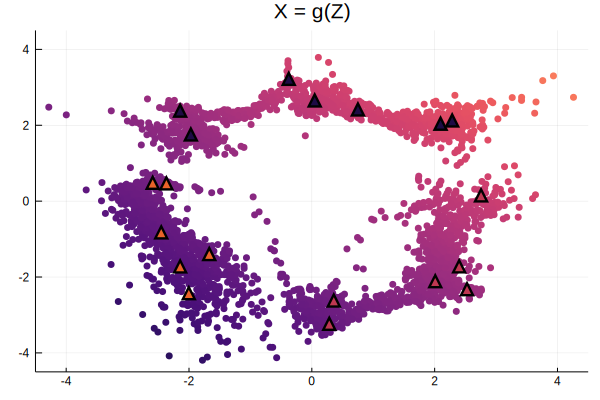

In [44]:
xs = convert(Array{Float32}, inverse(realnvp, convert(atype, zs)))
p4 = plot(xs[1,:], xs[2,:], title="X = g(Z)", seriestype = :scatter, xlim=(-4.5, 4.5), ylim=(-4.5,4.5), m=:magma, zcolor = xs[1,:]+xs[2,:], markerstrokewidth=0, legend=:none)
for i in 1:(maximum(int_labels)+1)
    m = [index[2] for index in findall(label->label==(i-1), int_labels)]
    xs = convert(Array{Float32}, data[1,m])
    ys = convert(Array{Float32}, data[2,m])
    plot!(xs, ys, seriestype = :scatter, markershape = :utriangle, zcolor=prior.means[1,i]+prior.means[2,i], markersize=6, markerstrokewidth=3)
end
p4

┌ Warning: rainbow is found in more than one library: misc, colorcet. Choosing misc
└ @ PlotUtils /kuacc/users/ssafadoust20/.julia/packages/PlotUtils/10ojB/src/color_gradients.jl:40


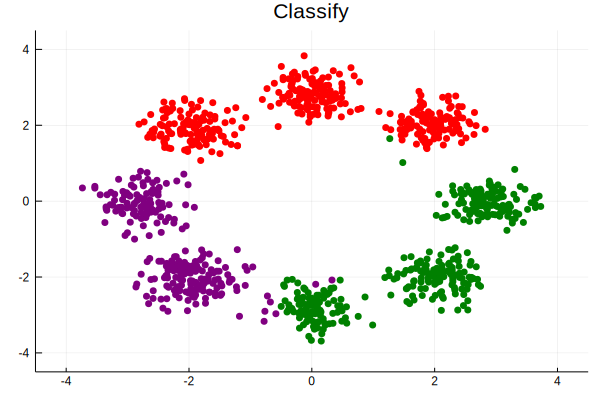

In [45]:
classes = classify(prior, inv)
array_inv = convert(Array{Float32}, inv)
xs = convert(Array{Float32}, data[1,:])
ys = convert(Array{Float32}, data[2,:])
p5 = plot(xs, ys, title="Classify", seriestype = :scatter, xlim=(-4.5, 4.5), ylim=(-4.5,4.5), m = :rainbow, zcolor = classes, markerstrokewidth=0, legend=:none)
p5

## Pinwheel Dataset

In [53]:
realnvp, prior, data, int_labels = train(in_dim=2, hidden_dim=512, num_coupling_layers=5, num_hidden_layers=1, k=256,
    lr=1e-4, steps=16001, print_freq=500, batch_size="auto", dataset="pinwheel", latent_mean_random=false);

iter 1 loss: T(22.368662) 
iter 501 loss: T(7.882484) 
iter 1001 loss: T(7.5756598) 
iter 1501 loss: T(7.8364925) 
iter 2001 loss: T(7.7319193) 
iter 2501 loss: T(7.6051664) 
iter 3001 loss: T(7.4082537) 
iter 3501 loss: T(7.414937) 
iter 4001 loss: T(7.3199944) 
iter 4501 loss: T(7.575501) 
iter 5001 loss: T(7.686107) 
iter 5501 loss: T(7.2426577) 
iter 6001 loss: T(7.4221864) 
iter 6501 loss: T(7.7820377) 
iter 7001 loss: T(7.6405516) 
iter 7501 loss: T(7.4385905) 
iter 8001 loss: T(7.2546577) 
iter 8501 loss: T(7.3305163) 
iter 9001 loss: T(7.582156) 
iter 9501 loss: T(7.1725726) 
iter 10001 loss: T(6.954414) 
iter 10501 loss: T(7.212383) 
iter 11001 loss: T(7.3160863) 
iter 11501 loss: T(7.30092) 
iter 12001 loss: T(7.8010397) 
iter 12501 loss: T(7.3227925) 
iter 13001 loss: T(7.129167) 
iter 13501 loss: T(7.091433) 
iter 14001 loss: T(7.3179636) 
iter 14501 loss: T(7.047807) 
iter 15001 loss: T(7.1113763) 
iter 15501 loss: T(7.201016) 
iter 16001 loss: T(7.016313) 


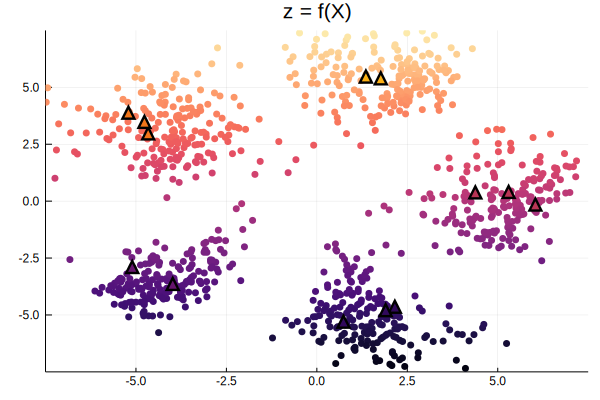

In [54]:
inv = realnvp(data)
xs = convert(Array{Float32}, inv[1,:])
ys = convert(Array{Float32}, inv[2,:])
p1 = plot(xs, ys, title="z = f(X)", seriestype = :scatter, xlim=(-7.5, 7.5), ylim=(-7.5,7.5), m = :magma, zcolor = ys, markerstrokewidth=0, legend=:none)
for i in 1:(maximum(int_labels)+1)
    m = [index[2] for index in findall(label->label==(i-1), int_labels)]
    xs = convert(Array{Float32}, inv[1,m])
    ys = convert(Array{Float32}, inv[2,m])
    plot!(xs, ys, seriestype = :scatter, markershape = :utriangle, zcolor=prior.means[2,i], markersize=6, markerstrokewidth=3)
end
p1

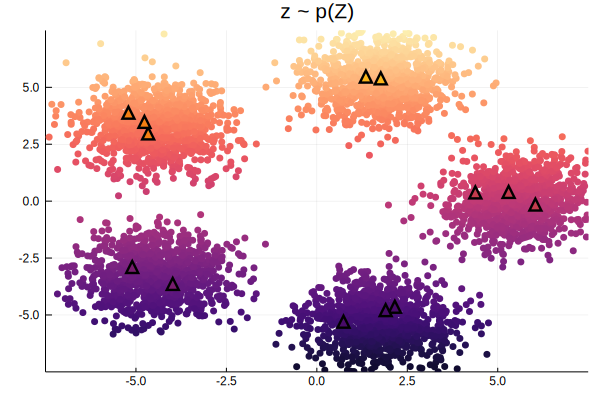

In [55]:
n_samples = 1000
zs = zeros(2, n_samples*prior.n_components)
for i in 1:prior.n_components
    for j in 1:n_samples
        z = Distributions.rand(prior.gaussians[i])
        zs[:,(i-1)*n_samples+j] = z
    end
end

p2 = plot(zs[1,:], zs[2,:], title="z ~ p(Z)", seriestype = :scatter, xlim=(-7.5, 7.5), ylim=(-7.5,7.5), m = :magma, zcolor = zs[2,:], markerstrokewidth=0, legend=:none)
for i in 1:(maximum(int_labels)+1)
    m = [index[2] for index in findall(label->label==(i-1), int_labels)]
    xs = convert(Array{Float32}, inv[1,m])
    ys = convert(Array{Float32}, inv[2,m])
    plot!(xs, ys, seriestype = :scatter, markershape = :utriangle, zcolor=prior.means[2,i], markersize=6, markerstrokewidth=3)
end
p2

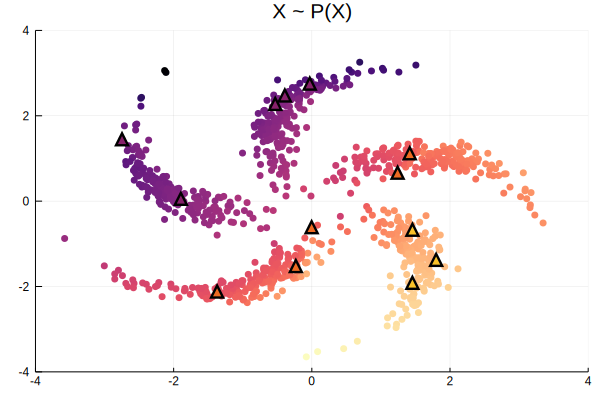

In [56]:
xs = convert(Array{Float32}, data[1,:])
ys = convert(Array{Float32}, data[2,:])
p3 = plot(xs, ys, title="X ~ P(X)", seriestype = :scatter, xlim=(-4, 4), ylim=(-4,4), m = :magma, zcolor = convert(Array{Float32},inv[1,:]), markerstrokewidth=0, legend=:none)
for i in 1:(maximum(int_labels)+1)
    m = [index[2] for index in findall(label->label==(i-1), int_labels)]
    xs = convert(Array{Float32}, data[1,m])
    ys = convert(Array{Float32}, data[2,m])
    plot!(xs, ys, seriestype = :scatter, markershape = :utriangle, zcolor=prior.means[1,i], markersize=6, markerstrokewidth=3)
end
p3

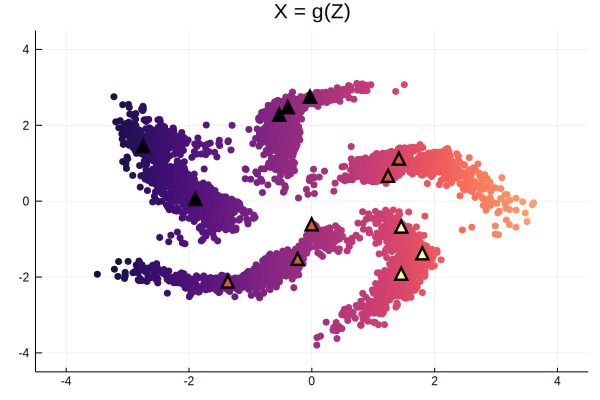

In [57]:
xs = convert(Array{Float32}, inverse(realnvp, convert(atype, zs)))
p4 = plot(xs[1,:], xs[2,:], title="X = g(Z)", seriestype = :scatter, xlim=(-4.5, 4.5), ylim=(-4.5,4.5), m=:magma, zcolor = xs[1,:], markerstrokewidth=0, legend=:none)
for i in 1:(maximum(int_labels)+1)
    m = [index[2] for index in findall(label->label==(i-1), int_labels)]
    xs = convert(Array{Float32}, data[1,m])
    ys = convert(Array{Float32}, data[2,m])
    plot!(xs, ys, seriestype = :scatter, markershape = :utriangle, zcolor=prior.means[1,i], markersize=6, markerstrokewidth=3)
end
p4

┌ Warning: rainbow is found in more than one library: misc, colorcet. Choosing misc
└ @ PlotUtils /kuacc/users/ssafadoust20/.julia/packages/PlotUtils/10ojB/src/color_gradients.jl:40


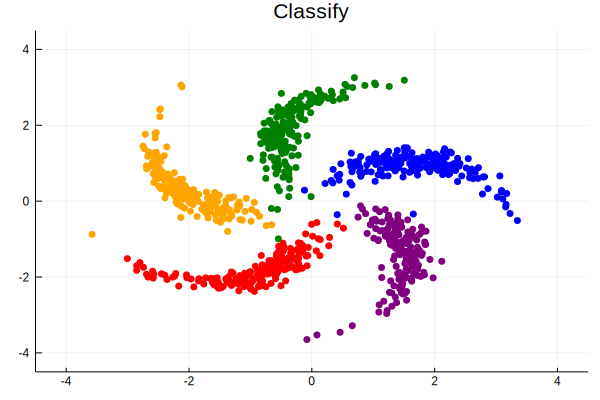

In [58]:
classes = classify(prior, inv)
array_inv = convert(Array{Float32}, inv)
xs = convert(Array{Float32}, data[1,:])
ys = convert(Array{Float32}, data[2,:])
p5 = plot(xs, ys, title="Classify", seriestype = :scatter, xlim=(-4.5, 4.5), ylim=(-4.5,4.5), m = :rainbow, zcolor = classes, markerstrokewidth=0, legend=:none)
p5

# UCI Datasets

## Miniboone Dataset (Without Random Latent Mean Initialization)

In [59]:
realnvp, prior, test_accuracy, train_accuracy = train(in_dim=50, hidden_dim=256, num_coupling_layers=7, num_hidden_layers=1, k=256,
    lr=3e-4, steps=40001, print_freq=10000, batch_size="auto", random_seed=125, dataset="miniboone", latent_mean_random=false);

iter 1 loss: T(1.5286005e8) 
iter 10001 loss: T(16381.222) 
iter 20001 loss: T(6667.0977) 
iter 30001 loss: T(2991.7776) 
iter 40001 loss: T(2239.1685) 
_____________________


In [62]:
println("Accuracy on Test Set:")
println(100 * test_accuracy)
println("Accuracy on Training Set: (Only 20 Datapoints Were Labeled)")
println(100 * train_accuracy)

Accuracy on Test Set:
79.94498624656164
Accuracy on Training Set: (Only 20 Datapoints Were Labeled)
79.04153846153847


## Miniboone Dataset (With Random Latent Mean Initialization)

In [63]:
realnvp, prior, test_accuracy, train_accuracy = train(in_dim=50, hidden_dim=256, num_coupling_layers=7, num_hidden_layers=1, k=256,
    lr=3e-4, steps=45001, print_freq=5000, batch_size="auto", random_seed=125, dataset="miniboone", latent_mean_random=true);

iter 1 loss: T(1.895589e8) 
iter 5001 loss: T(965.3756) 
iter 10001 loss: T(419.81583) 
iter 15001 loss: T(343.2544) 
iter 20001 loss: T(295.54263) 
iter 25001 loss: T(262.76627) 
iter 30001 loss: T(246.79878) 
iter 35001 loss: T(245.93594) 
iter 40001 loss: T(243.22928) 
iter 45001 loss: T(233.36436) 
_____________________


In [64]:
println("Accuracy on Test Set:")
println(100 * test_accuracy)
println("Accuracy on Training Set: (Only 20 Datapoints Were Labeled)")
println(100 * train_accuracy)

Accuracy on Test Set:
74.30607651912979
Accuracy on Training Set: (Only 20 Datapoints Were Labeled)
73.80461538461537


## Hepmass Dataset

In [68]:
realnvp, prior, test_accuracy, _ = train(in_dim=27, hidden_dim=256, num_coupling_layers=7, num_hidden_layers=1, k=256,
    lr=1e-4, steps=501, print_freq=20, batch_size=20, random_seed=125, dataset="hepmass", latent_mean_random=false);

iter 1 loss: T(210.08983) 
iter 21 loss: T(188.07506) 
iter 41 loss: T(167.25267) 
iter 61 loss: T(148.48636) 
iter 81 loss: T(128.4036) 
iter 101 loss: T(110.39593) 
iter 121 loss: T(100.89911) 
iter 141 loss: T(96.27407) 
iter 161 loss: T(94.49435) 
iter 181 loss: T(91.3234) 
iter 201 loss: T(88.78219) 
iter 221 loss: T(89.44332) 
iter 241 loss: T(87.56679) 
iter 261 loss: T(87.059715) 
iter 281 loss: T(85.034615) 
iter 301 loss: T(86.50291) 
iter 321 loss: T(86.016396) 
iter 341 loss: T(85.47918) 
iter 361 loss: T(82.92773) 
iter 381 loss: T(82.73982) 
iter 401 loss: T(84.10575) 
iter 421 loss: T(82.1956) 
iter 441 loss: T(80.6755) 
iter 461 loss: T(80.551994) 
iter 481 loss: T(79.65165) 
iter 501 loss: T(79.13938) 
_____________________


In [69]:
println("Accuracy on Test Set:")
println(100 * test_accuracy)

Accuracy on Test Set:
88.38457142857142


# NLP Datasets

## AG News Dataset (Without Random Latent Mean Initialization)

In [70]:
realnvp, prior, test_accuracy, train_accuracy = train(in_dim=768, hidden_dim=512, num_coupling_layers=7, num_hidden_layers=1, k=512,
    lr=1e-4, steps=8901, print_freq=100, batch_size=20, random_seed=123, dataset="ag_news", latent_mean_random=false);

iter 1 loss: T(16311.625) 
iter 101 loss: T(2034.3505) 
iter 201 loss: T(1632.8893) 
iter 301 loss: T(1518.1807) 
iter 401 loss: T(1409.4023) 
iter 501 loss: T(1357.3535) 
iter 601 loss: T(1293.6094) 
iter 701 loss: T(1258.6355) 
iter 801 loss: T(1253.2092) 
iter 901 loss: T(1235.6981) 
iter 1001 loss: T(1169.2996) 
iter 1101 loss: T(1127.2788) 
iter 1201 loss: T(1155.1464) 
iter 1301 loss: T(1097.9061) 
iter 1401 loss: T(1081.5658) 
iter 1501 loss: T(1066.2704) 
iter 1601 loss: T(1032.5883) 
iter 1701 loss: T(1018.13477) 
iter 1801 loss: T(1049.333) 
iter 1901 loss: T(1033.797) 
iter 2001 loss: T(1000.73303) 
iter 2101 loss: T(975.75116) 
iter 2201 loss: T(944.7431) 
iter 2301 loss: T(964.3039) 
iter 2401 loss: T(957.1579) 
iter 2501 loss: T(937.8232) 
iter 2601 loss: T(944.9998) 
iter 2701 loss: T(887.16534) 
iter 2801 loss: T(930.5665) 
iter 2901 loss: T(913.9512) 
iter 3001 loss: T(915.11957) 
iter 3101 loss: T(914.4406) 
iter 3201 loss: T(865.8955) 
iter 3301 loss: T(842.7539) 
it

In [71]:
println("Accuracy on Test Set:")
println(100 * test_accuracy)
println("Accuracy on Training Set: (Only 200 Datapoints Were Labeled)")
println(100 * train_accuracy)

Accuracy on Test Set:
81.06578947368422
Accuracy on Training Set: (Only 200 Datapoints Were Labeled)
81.28833333333333


## AG News Dataset (With Random Latent Mean Initialization)

In [72]:
realnvp, prior, test_accuracy, train_accuracy = train(in_dim=768, hidden_dim=512, num_coupling_layers=7, num_hidden_layers=1, k=512,
    lr=1e-4, steps=901, print_freq=100, batch_size=20, random_seed=123, dataset="ag_news", latent_mean_random=true);

iter 1 loss: T(6109.2925) 
iter 101 loss: T(1789.4276) 
iter 201 loss: T(1589.0947) 
iter 301 loss: T(1440.6002) 
iter 401 loss: T(1336.5905) 
iter 501 loss: T(1267.3016) 
iter 601 loss: T(1219.9083) 
iter 701 loss: T(1173.4854) 
iter 801 loss: T(1169.8899) 
iter 901 loss: T(1141.0912) 
_____________________


In [73]:
println("Accuracy on Test Set:")
println(100 * test_accuracy)
println("Accuracy on Training Set: (Only 200 Datapoints Were Labeled)")
println(100 * train_accuracy)

Accuracy on Test Set:
79.96052631578947
Accuracy on Training Set: (Only 200 Datapoints Were Labeled)
79.70666666666666


## Yahoo Answers Dataset

In [76]:
realnvp, prior, test_accuracy, _ = train(in_dim=768, hidden_dim=512, num_coupling_layers=7, num_hidden_layers=1, k=512,
    lr=1e-4, steps=5001, print_freq=1000, batch_size=80, random_seed=124, dataset="yahoo_answers", latent_mean_random=false);

iter 1 loss: T(17803.266) 
iter 1001 loss: T(1027.5331) 
iter 2001 loss: T(871.3332) 
iter 3001 loss: T(791.94257) 
iter 4001 loss: T(699.7265) 
iter 5001 loss: T(692.533) 
_____________________


In [77]:
println("Accuracy on Test Set:")
println(100 * test_accuracy)

Accuracy on Test Set:
51.193333333333335
